In [511]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import langid
from mtranslate import translate

ModuleNotFoundError: No module named 'langid'

In [ ]:
df = pd.read_csv('data/new_data.csv')
df.head()

,jobId,jobTitle,companyName,isAnonymous,isSalaryVisible,jobDescription,jobRequirement,jobLevelId,salary,salaryMax,...,address,industries,jobLevel,jobLevelVI,companySize,languageSelected,prettySalary,durationDays,numOfApplications,typeWorkingName
0,1680760,Nhân Viên Kinh Doanh MT - GT,Công Ty Cổ Phần S77 Hà Nội,False,True,1. Doanh số bán hàng\n- Thực hiện bán hàng the...,- Ít nhất 1 năm kinh nghiệm ở vị trí tương đươ...,5,700,700,...,Hà Nội,"{11: 'Customer Service', 32: 'Retail/Wholesale...",Experienced (non-manager),Nhân viên,"(10, 24)",Any,$500 - $700,30,0,Full-time
1,1680765,Social Media Specialist (Full Time/part-Time),Công Ty TNHH Jung Wisdom International,False,False,WE’RE HIRING: SOCIAL MEDIA SPECIALIST (FULL TI...,QUALIFICATIONS\n- Fluent in English (IELTS or ...,5,0,0,...,"No.298, Vo Chi Cong street, Xuan La Ward, Tay ...","{3: 'Advertising/Promotion/PR', 27: 'Marketing...",Experienced (non-manager),Nhân viên,"(25, 99)",English,Thương lượng,30,0,Full-time
2,1680758,Kế Toán Tổng Hợp,Công Ty Cổ Phần S77 Hà Nội,False,True,- Ghi nhận kiểm tra các nghiệp vụ phát sinh và...,1. Tuổi: Từ 25\n2. Bằng cấp: Cao đẳng/Đại Học\...,5,700,700,...,Hà Nội,"{1: 'Accounting', 58: 'Auditing', 59: 'Finance...",Experienced (non-manager),Nhân viên,"(10, 24)",Any,$500 - $700,30,0,Full-time
3,1680741,Marketing Staff,Công Ty TNHH Bán Lẻ Fujimart Việt Nam,False,False,"-\tIn charge of trade marketing activities, co...",-\tBachelor degree of Marketing/ Business Admi...,5,0,0,...,"Tầng 6, 51 Phố Lê Đại Hành, Quận Hai Bà Trưng,...","{3: 'Advertising/Promotion/PR', 27: 'Marketing...",Experienced (non-manager),Nhân viên,"(100, 499)",Any,Thương lượng,30,0,Full-time
4,1680162,Chuyên Viên Chính Quan Hệ Khách Hàng Ưu Tiên -...,Ngân Hàng TMCP Quốc Dân (Ncb),False,False,"- Thực hiện hoạt động tìm kiếm, phát triển và ...","- Tốt nghiệp chuyên ngành Tài chính-ngân hàng,...",5,0,0,...,"28C-28D Bà Triệu, Phường Hàng Bài, Hà Nội","{33: 'Sales', 42: 'Banking', 59: 'Finance/Inve...",Experienced (non-manager),Nhân viên,"(100, 499)",Vietnamese,Thương lượng,30,0,Full-time


<h3><b>PHÂN TÍCH</b></h3>
<hr>
<h4><b><i>Câu hỏi đặt ra</b></i>: <br>
1. Loại hình làm việc các công ty ưa chuộng trong tuyển dụng nhân viên? <br>
2. Lợi ích mà ứng viên thường được công ty cung cấp? <br>
3. Công ty tuyển dụng có quy mô như thế nào? <br>
4. Công việc đòi hỏi trình độ như thế nào? <br>

<h4><b><i>Phân tích trả lời câu hỏi</b></i>: <br>
1. Loại hình làm việc các công ty ưa chuộng trong tuyển dụng nhân viên?

In [ ]:
type_working = pd.Series(df['typeWorkingName'].value_counts())
type_working

typeWorkingName
Full-time      8848
Part-time        46
Internship       29
Freelancer       26
Other            11
Seasonal         10
Online jobs       2
Name: count, dtype: int64

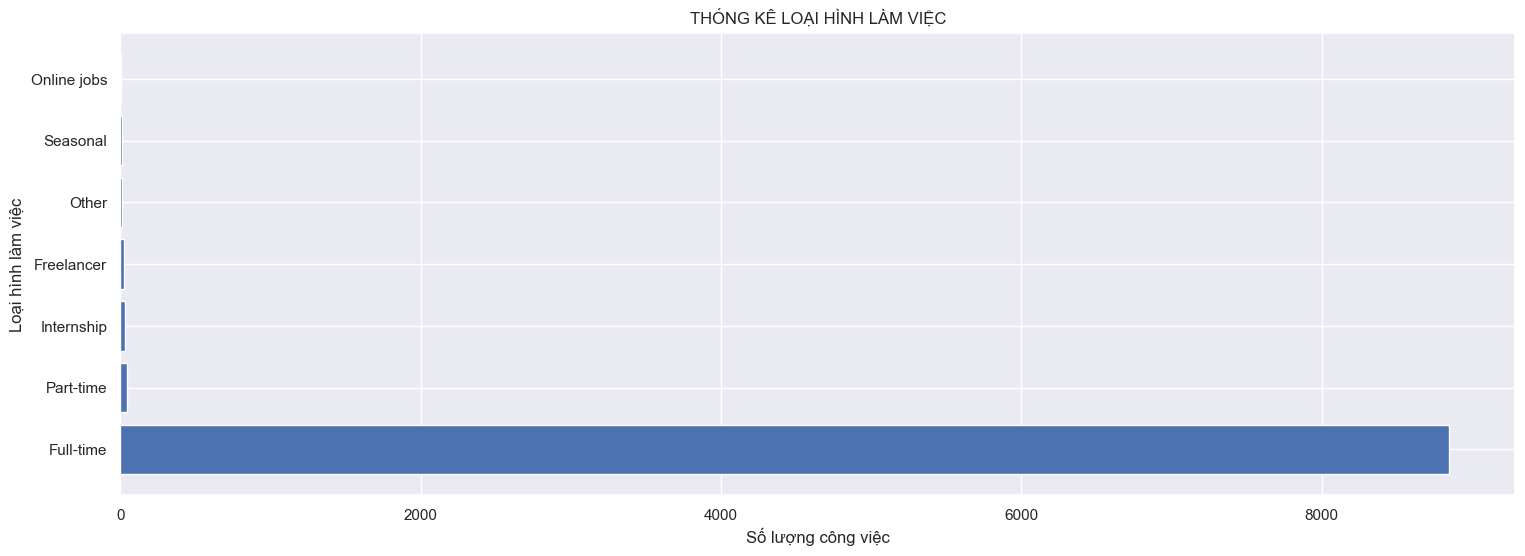

In [ ]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
plt.barh(type_working.index, type_working.values)
plt.title('THỐNG KÊ LOẠI HÌNH LÀM VIỆC')
plt.ylabel('Loại hình làm việc')
plt.xlabel('Số lượng công việc');
plt.show()

=> 1. Loại hình làm việc các công ty ưa chuộng trong tuyển dụng nhân viên? <br>
<b>Trả lời</b>: Các công ty tuyển dụng thường ưu tiên việc làm toàn thời gian với hơn 8000 công việc (chiếm gần như tát cả công việc tuyển dụng) <br>
<b>Lý do</b>: Với loại hình làm việc toàn thời gian công ty có thể quản lý nhân viên và kiểm soát công việc dễ dàng hơn so với các loại hình khác

<hr>
<h4>2. Lợi ích mà ứng viên thường được công ty cung cấp?

In [ ]:
df['benefits']

0       {1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...
1       {1: 'Bonus', 2: 'Healthcare Plan', 4: 'Training'}
2       {1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...
3       {1: 'Bonus', 2: 'Healthcare Plan', 9: 'Travel ...
4                {1: 'Bonus', 4: 'Training', 5: 'Awards'}
                              ...                        
8967              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
8968              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
8969    {2: 'Healthcare Plan', 3: 'Paid Leave', 10: 'T...
8970              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
8971              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
Name: benefits, Length: 8972, dtype: object

In [ ]:
df['benefits'] = df['benefits'].apply(eval)
benefits_data =[]
for i in df['benefits']:
    for j in i.values():
        benefits_data.append(j)
benefits = pd.Series(pd.Series(benefits_data).value_counts())
benefits

Bonus                   7601
Healthcare Plan         5564
Training                2542
Paid Leave              2162
Others                  2051
Travel Opportunities    1534
Team Activities         1044
Awards                   810
Transportation           792
Laptop                   614
Canteen                  375
Vouchers                 194
Mobile                    91
Library                   56
Kindergarten              29
Name: count, dtype: int64

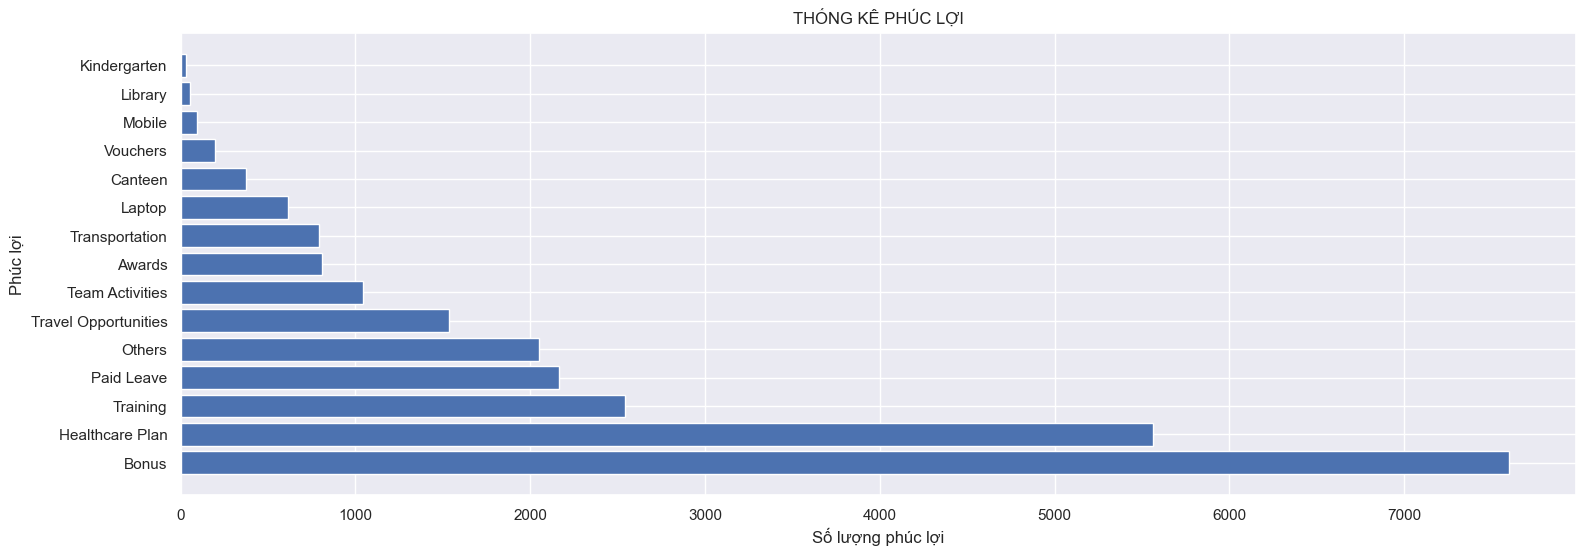

In [ ]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
plt.barh(benefits.index, benefits.values)
plt.title('THỐNG KÊ PHÚC LỢI')
plt.ylabel('Phúc lợi')
plt.xlabel('Số lượng phúc lợi');
plt.show()

=> 2. Lợi ích mà ứng viên thường được công ty cung cấp? <br>
<b>Trả lời</b>: Dựa vào biểu đồ ta có thể thấy có 3 phúc lợi chủ yếu, đánh thẳng vào tâm lý của ứng viên đó là thưởng, được chăm sóc về sức khỏe và được đào tạo để nâng cao trình đồ  <br>
<b>Lý do</b>: Đó là những yếu tố cơ bản mà công ty có thể dễ dàng cung cấp cho ứng viên

<hr>
<h4>3. Công ty tuyển dụng có quy mô như thế nào?

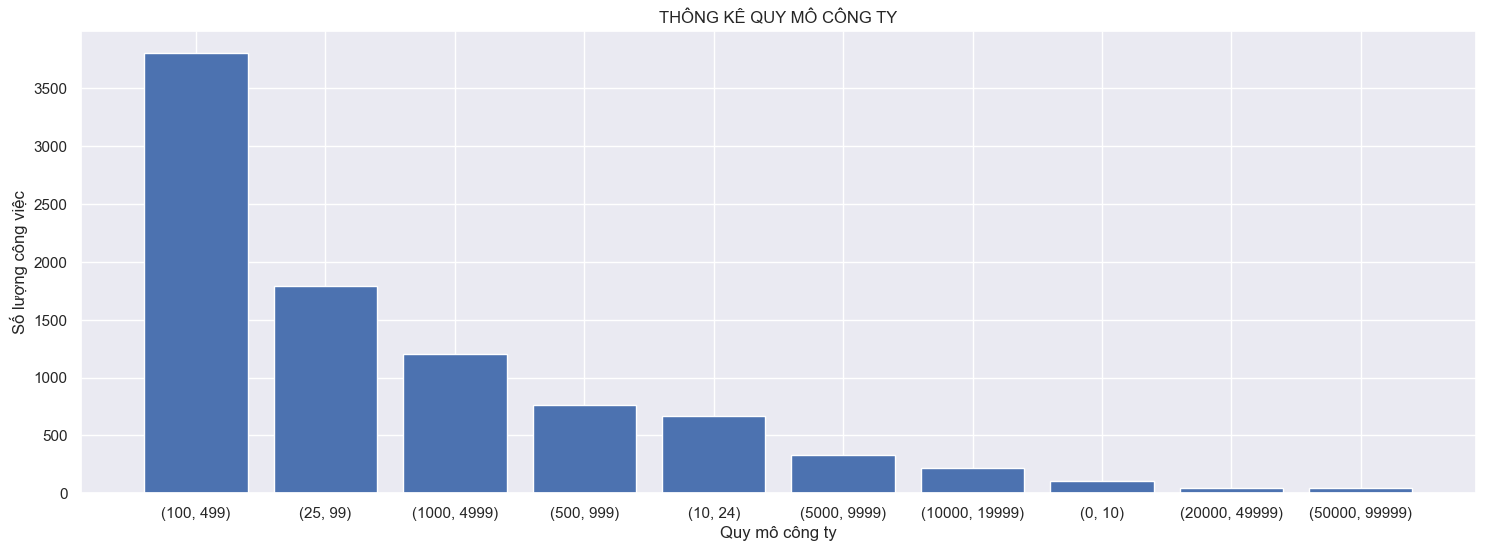

In [ ]:
company_size = pd.Series(df['companySize'].value_counts())
company_size
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
plt.bar(company_size.index, company_size.values)
plt.title('THÔNG KÊ QUY MÔ CÔNG TY')
plt.xlabel('Quy mô công ty')
plt.ylabel('Số lượng công việc');

=> 3. Công ty tuyển dụng có quy mô như thế nào? <br>
<b>Trả lời</b>: Quy mô hầu hết của công ty tuyển dụng ứng viên là 100-400 <br>
<b>Lý do</b>: Điều này phản ánh chín xác tình hình thực tế thị trường lao động Việt Nam vì các công ty Viện Nam chủ yếu có quy mô nhỏ và vừa

<hr>
<h4>4. Công việc đòi hỏi trình độ như thế nào?

In [ ]:
job_level = pd.Series(df['jobLevel'].value_counts())
job_level

jobLevel
Experienced (non-manager)    5956
Manager                      1461
Fresher/Entry level          1154
Director and above            236
Intern/Student                165
Name: count, dtype: int64

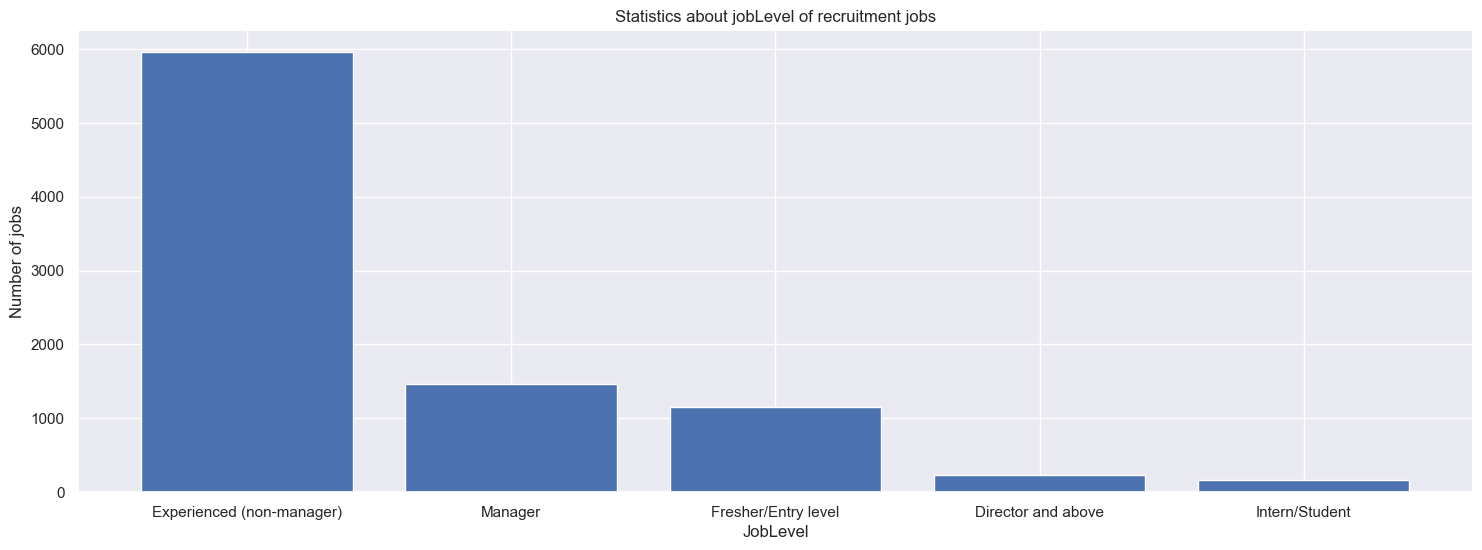

In [ ]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
plt.bar(job_level.index,job_level.values)
plt.title('Statistics about jobLevel of recruitment jobs')
plt.ylabel('Number of jobs')
plt.xlabel('JobLevel');

=> Công việc đòi hỏi trình độ như thế nào? <br>
<b>Trả lời</b>: Hầu hết các công ty tuyển dụng nhân viên đã có kinh nghiệm làm việc (không phải quản lý) và chỉ một số ít công ty tuyển nhân viên thực tập/sinh viên <br>
<b>Lý do</b>: Tuyển dụng nhân viên có kinh nghiệm để có thể kiểm tra khả năng làm việc cũng như khả năng thích ứng với công việc sẽ tốt hơn. Ngược lại, số lượng công việc cần tuyển dụng thực tập/sinh viên rất nhỏ vì đây là nhóm người và họ cần được đào tạo để có khả năng làm việc cho công ty

<hr>
<h5> Top 20 </h5>


1. Top 20 công ty tuyển nhân viên nhiều nhất? <br>
Dựa vào thông tin thu thập được có thể tìm hiểu và apply để nâng cao cơ hội có thể tim được việc làm cho bản thân.

In [ ]:
df['companyName'].value_counts()
company_name = pd.Series(df['companyName'].value_counts())
top_20_companies = company_name[:20]

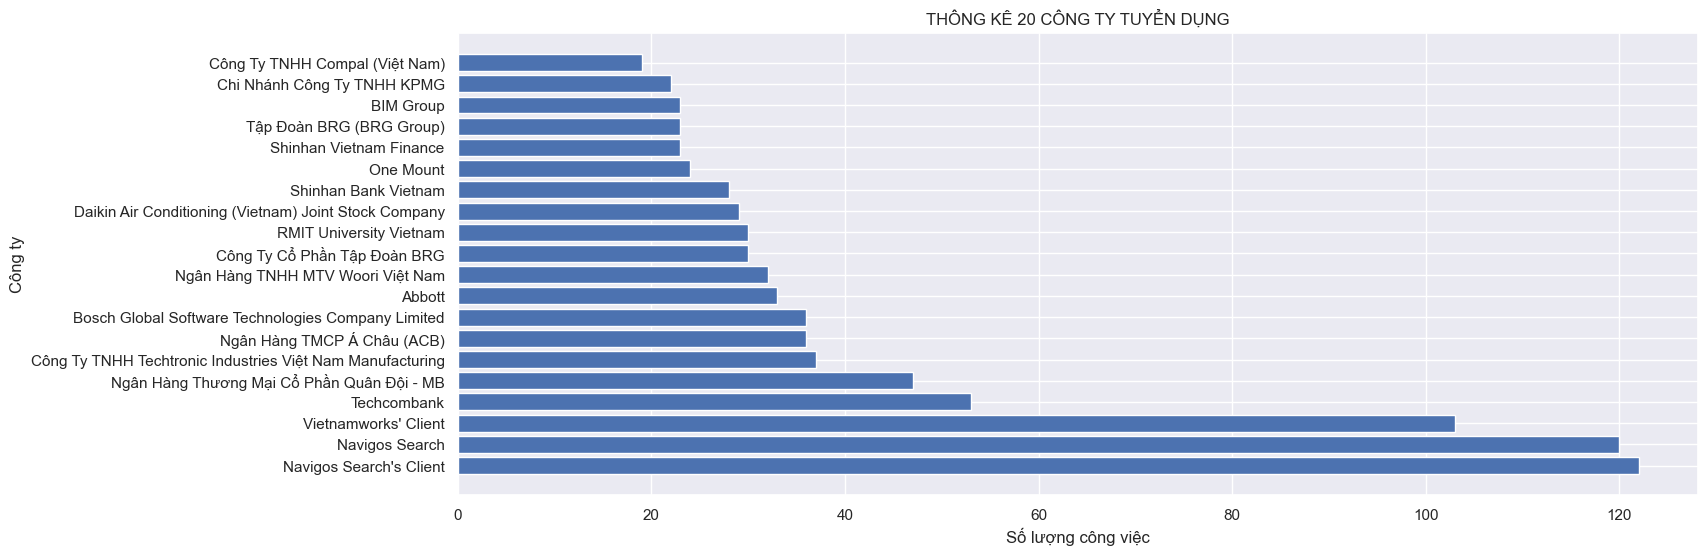

In [ ]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (16,6))
plt.barh(top_20_companies.index, top_20_companies.values)
plt.title('THÔNG KÊ 20 CÔNG TY TUYỂN DỤNG')
plt.xlabel('Số lượng công việc')
plt.ylabel('Công ty');

2. Top 20 địa điểm tuyển dụng ứng viên nhiều nhất? <br>
Tìm được những địa điểm cần nguồn năng lực để có thể đưa ra những lựa chọn thích hợp cho bản thân.

In [ ]:
df['workingLocations'] = df['workingLocations'].apply(eval)
locations_data =[]
for i in df['workingLocations']:
    for j in i.values():
        locations_data.append(j)

In [ ]:
locations = pd.Series(pd.Series(locations_data).value_counts())[0:20]
locations

Hà Nội               3980
Hồ Chí Minh          3949
Hải Phòng             278
Bình Dương            277
Bắc Ninh              266
Hưng Yên              239
Đồng Nai              214
Đà Nẵng               193
Hải Dương             190
Hà Nam                108
Long An                93
Bắc Giang              93
Bà Rịa - Vũng Tàu      91
Vĩnh Phúc              88
Cần Thơ                50
Quảng Nam              46
Quốc tế                44
Quảng Ninh             40
Thái Nguyên            39
Thanh Hóa              39
Name: count, dtype: int64

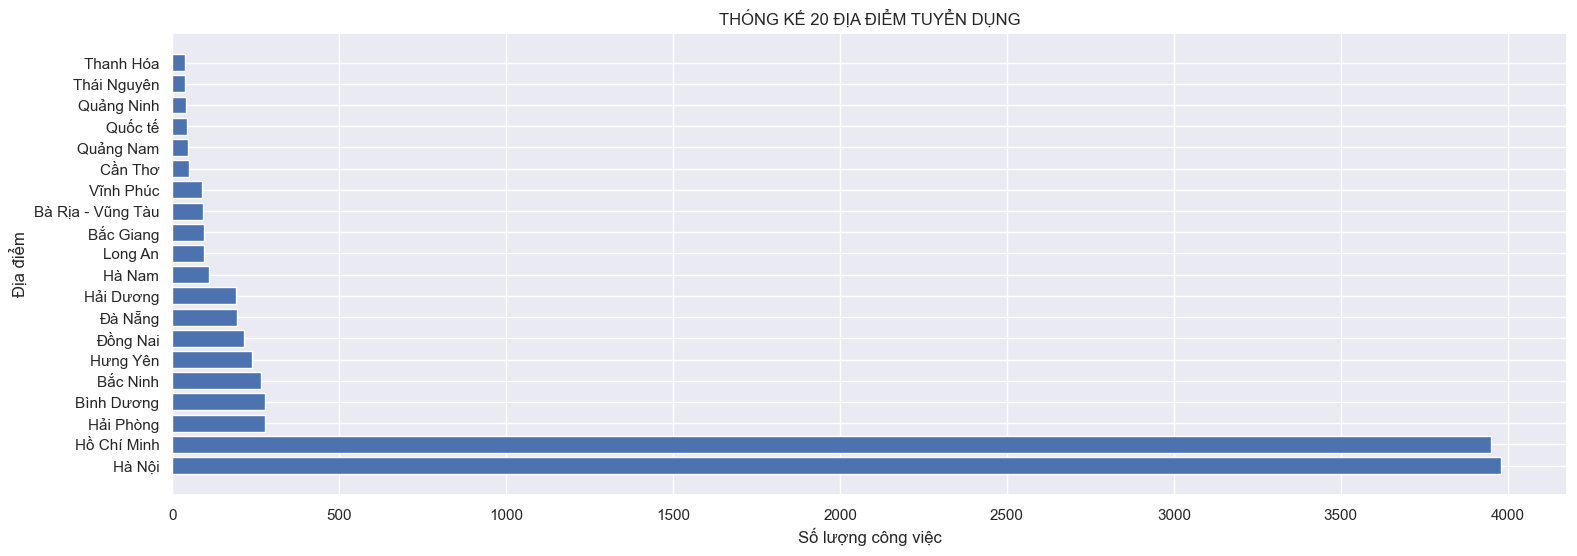

In [ ]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (18,6))
# sns.barplot(y =locations.index, x = locations.values)
plt.barh(locations.index,locations.values)
plt.title('THỐNG KẾ 20 ĐỊA ĐIỂM TUYỂN DỤNG')
plt.xlabel('Số lượng công việc')
plt.ylabel('Địa điểm');

3. Top 20 kỹ năng nhà tuyển dụng quan tâm <br>
Chúng ta có thể phát triển những kỹ năng được ưa chuộng này cho bản thân, từ đó dễ dàng nộp đơn cho những công việc mà chúng ta thích.

In [ ]:
df['skills'] = df['skills'].apply(eval)
skills_data =[]
for i in df['skills']:
    for j in i.values():
        skills_data.append(j)

In [ ]:
skills = pd.Series(pd.Series(skills_data).value_counts())[0:20]
skills

English                 782
Kinh Doanh              583
Chăm Sóc Khách Hàng     516
Bán Hàng                504
Tiếng Anh               494
Tìm Kiếm Khách Hàng     330
AutoCAD                 257
Business Development    253
Kế Toán                 247
Communication           232
Tài Chính               225
Digital Marketing       205
Customer Service        200
Tư Vấn                  196
Tiếng Trung             184
Accounting              176
Kế Toán Tổng Hợp        162
Cơ Khí                  145
Kiểm Toán               138
Ngân Hàng               138
Name: count, dtype: int64

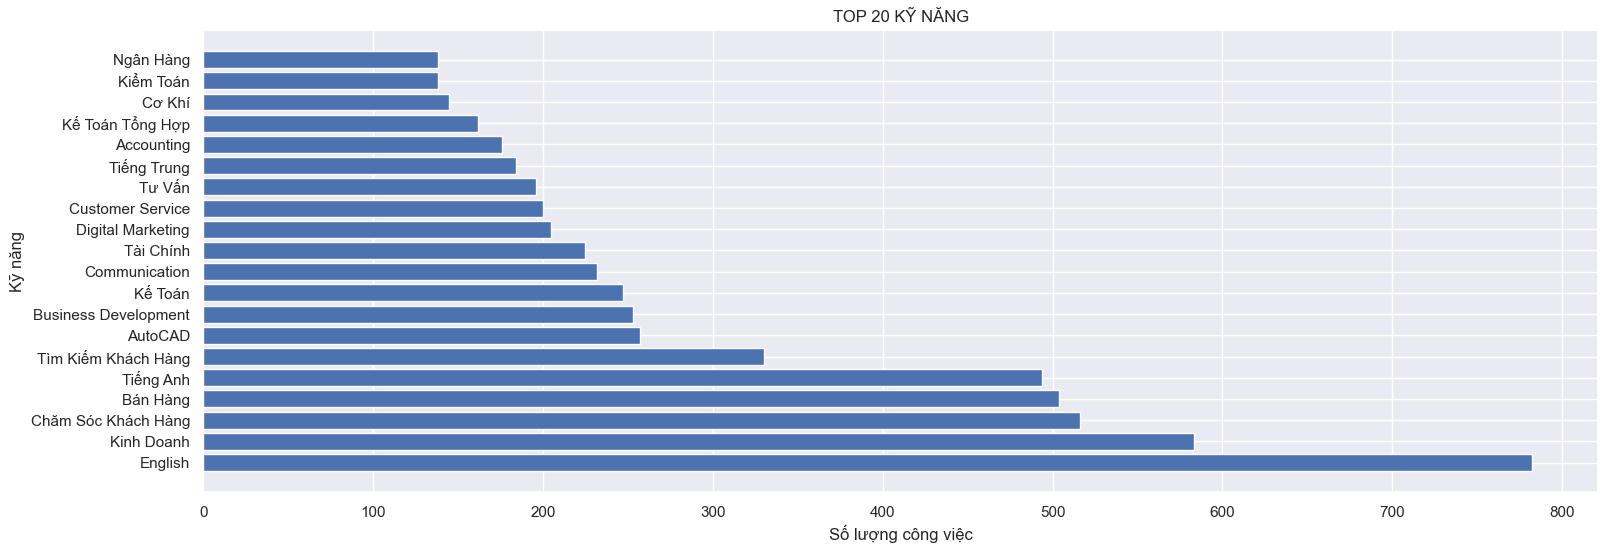

In [ ]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (18,6))
plt.barh(skills.index,skills.values)
plt.title('TOP 20 KỸ NĂNG')
plt.xlabel('Số lượng công việc')
plt.ylabel('Kỹ năng');

4. Top 20 ngành công nghiệp được ưa chuộng trong tuyển dụng <br>
Đánh giá được xu hướng của xã hội từ đó chọn được công việc phù hợp

In [ ]:
df['industries'] = df['industries'].apply(eval)
industries_data =[]
for i in df['industries']:
    for j in i.values():
        industries_data.append(j)

In [ ]:
industries = pd.Series(pd.Series(industries_data).value_counts())[0:20]
industries

Sales                       1862
Finance/Investment          1405
Customer Service             989
Marketing                    962
Administrative/Clerical      940
IT - Software                913
Electrical/Electronics       831
Accounting                   811
Banking                      773
Mechanical                   688
Production/Process           681
Auditing                     672
Civil/Construction           603
Education/Training           582
Planning/Projects            573
IT - Hardware/Networking     550
Advertising/Promotion/PR     534
Sales Technical              526
Human Resources              510
Consulting                   484
Name: count, dtype: int64

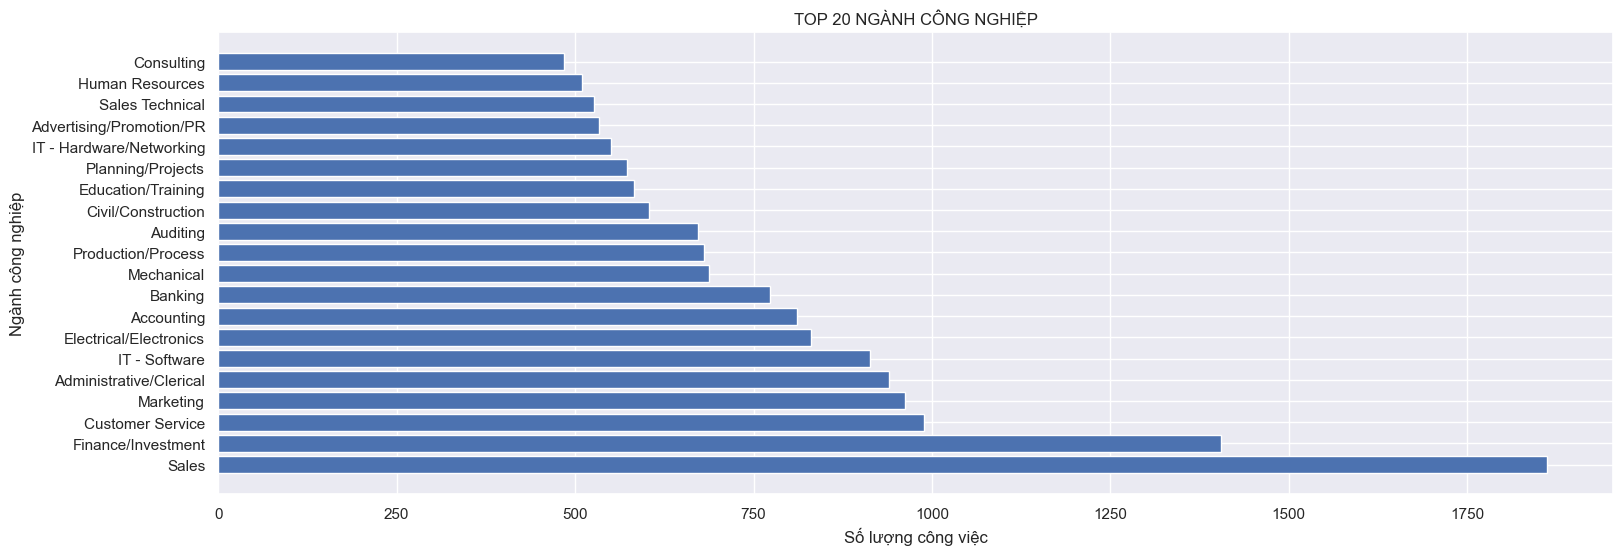

In [ ]:
fig, ax = plt.subplots(figsize = (18,6))
# sns.barplot(y =industries.index, x = industries.values)
plt.barh(industries.index,industries.values)
plt.title('TOP 20 NGÀNH CÔNG NGHIỆP')
plt.xlabel('Số lượng công việc')
plt.ylabel('Ngành công nghiệp');

<hr>
1.Mức lương trung bình theo từng khu vực

In [ ]:
df[df['isSalaryVisible'] == True]['isSalaryVisible'].count()
temp_df = df[df['isSalaryVisible'] == True]

In [ ]:
locations_salary_df = temp_df[['workingLocations','salary']].copy()
locations_salary_df['workingLocations'] = locations_salary_df['workingLocations']\
                                    .astype(str)\
                                    .apply(lambda x: list(ast.literal_eval(x).values()))
#print(locations_salary_df['workingLocations'])
locations_salary_df = locations_salary_df.explode('workingLocations')
locations_salary_df

,workingLocations,salary
0,Hà Nội,700
2,Hà Nội,700
5,Hà Nội,500
6,Hà Nội,650
8,Hồ Chí Minh,1200
...,...,...
8958,Hồ Chí Minh,1300
8962,Hồ Chí Minh,4500
8963,Hồ Chí Minh,650
8966,Bắc Ninh,2000


In [ ]:
avg_salary = round(locations_salary_df.groupby('workingLocations')['salary'].mean().reset_index())
avg_salary = avg_salary.rename(columns = {'salary': 'avgsalary'})
avg_salary

,workingLocations,avgsalary
0,An Giang,1750.0
1,Bà Rịa - Vũng Tàu,1191.0
2,Bình Dương,1166.0
3,Bình Phước,875.0
4,Bình Thuận,960.0
5,Bình Định,1992.0
6,Bạc Liêu,1125.0
7,Bắc Giang,1109.0
8,Bắc Kạn,1500.0
9,Bắc Ninh,1042.0


In [ ]:
locations_jobs = locations_salary_df.groupby('workingLocations').count().reset_index()
locations_jobs = locations_jobs.rename(columns = {'salary': 'numberOfjobs'})
locations_jobs

,workingLocations,numberOfjobs
0,An Giang,2
1,Bà Rịa - Vũng Tàu,25
2,Bình Dương,62
3,Bình Phước,8
4,Bình Thuận,2
5,Bình Định,6
6,Bạc Liêu,2
7,Bắc Giang,46
8,Bắc Kạn,2
9,Bắc Ninh,101


In [ ]:
locations_df = pd.concat([locations_jobs, avg_salary['avgsalary']], axis=1)
locations_df

,workingLocations,numberOfjobs,avgsalary
0,An Giang,2,1750.0
1,Bà Rịa - Vũng Tàu,25,1191.0
2,Bình Dương,62,1166.0
3,Bình Phước,8,875.0
4,Bình Thuận,2,960.0
5,Bình Định,6,1992.0
6,Bạc Liêu,2,1125.0
7,Bắc Giang,46,1109.0
8,Bắc Kạn,2,1500.0
9,Bắc Ninh,101,1042.0


In [ ]:
locations_avg_salary_df = locations_df.sort_values\
                    (by = 'avgsalary', ascending = False)[:10]
locations_avg_salary_df

,workingLocations,numberOfjobs,avgsalary
39,Quốc tế,26,4085.0
48,Tuyên Quang,1,3000.0
32,Ninh Thuận,1,2200.0
40,Sóc Trăng,1,2000.0
35,Quảng Bình,1,2000.0
5,Bình Định,6,1992.0
0,An Giang,2,1750.0
36,Quảng Nam,11,1745.0
22,Khác,6,1692.0
29,Nam Định,5,1564.0


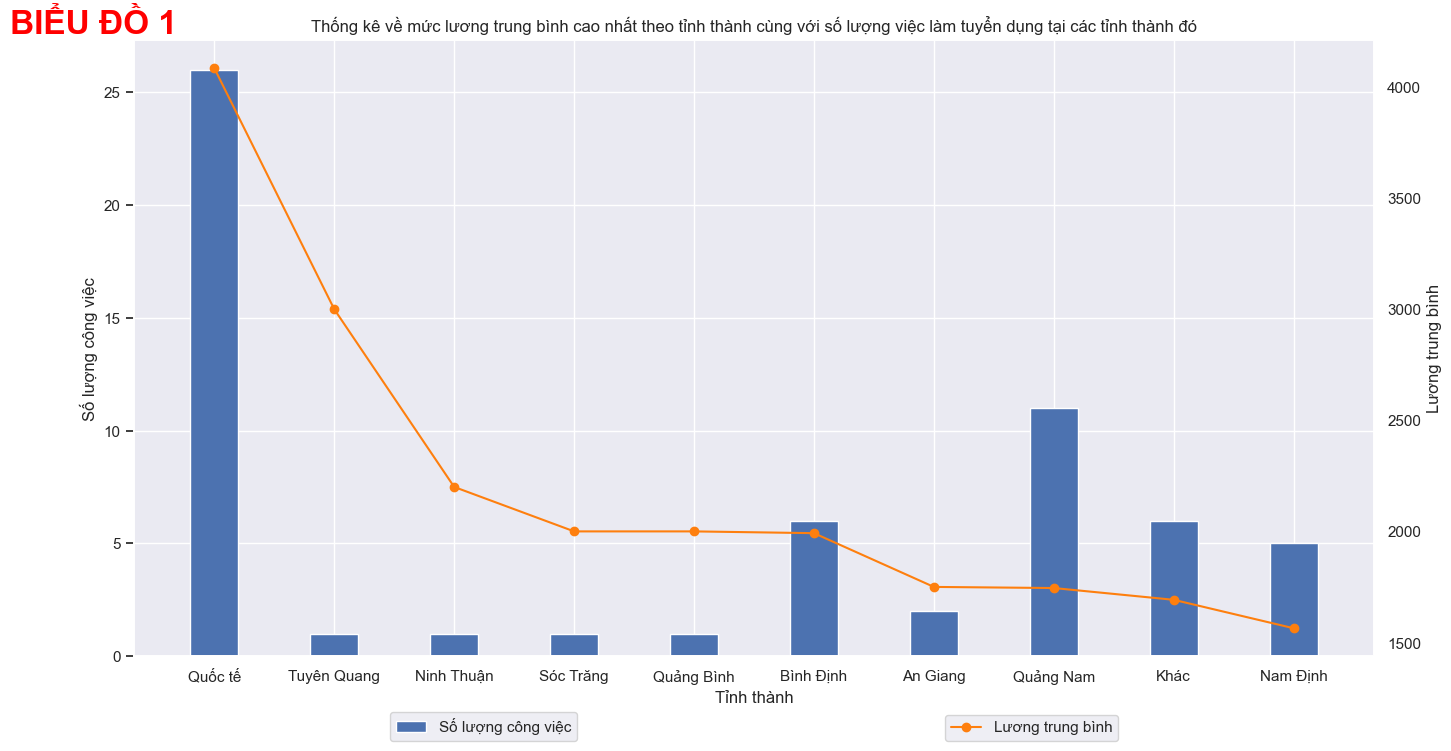

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(locations_avg_salary_df['workingLocations'],\
        locations_avg_salary_df['numberOfjobs'],width = 0.4)
ax.set_xlabel('Tỉnh thành')
ax.set_ylabel('Số lượng công việc')
ax.tick_params(left=False)
ax.legend(['Số lượng công việc'],loc='lower left',bbox_to_anchor=(0.2, -0.15))

ax2 = ax.twinx()
ax2.plot(locations_avg_salary_df['workingLocations'],\
          locations_avg_salary_df['avgsalary'],marker='o',color='#fe7f0e')
ax2.set_ylabel('Lương trung bình')
ax2.grid(False)
ax2.tick_params(right=False)
ax2.legend(['Lương trung bình'],loc='lower right',bbox_to_anchor=(0.8, -0.15))

plt.title('Thống kê về mức lương trung bình cao nhất theo tỉnh thành \
cùng với số lượng việc làm tuyển dụng tại các tỉnh thành đó')
plt.text(-0.1, 1.05, "BIỂU ĐỒ 1", transform=ax.transAxes, fontsize=24, color = 'red' , fontweight='bold', va='top')
plt.show()

2.Số lượng công việc theo từng khu vực

In [ ]:
locations_number_jobs_df = locations_df.sort_values\
                    (by = 'numberOfjobs', ascending = False)[:10]
locations_number_jobs_df

,workingLocations,numberOfjobs,avgsalary
14,Hà Nội,1695,1309.0
21,Hồ Chí Minh,1307,1459.0
9,Bắc Ninh,101,1042.0
19,Hải Phòng,92,1102.0
2,Bình Dương,62,1166.0
17,Hưng Yên,61,1115.0
55,Đà Nẵng,56,1444.0
18,Hải Dương,55,955.0
51,Vĩnh Phúc,51,909.0
7,Bắc Giang,46,1109.0


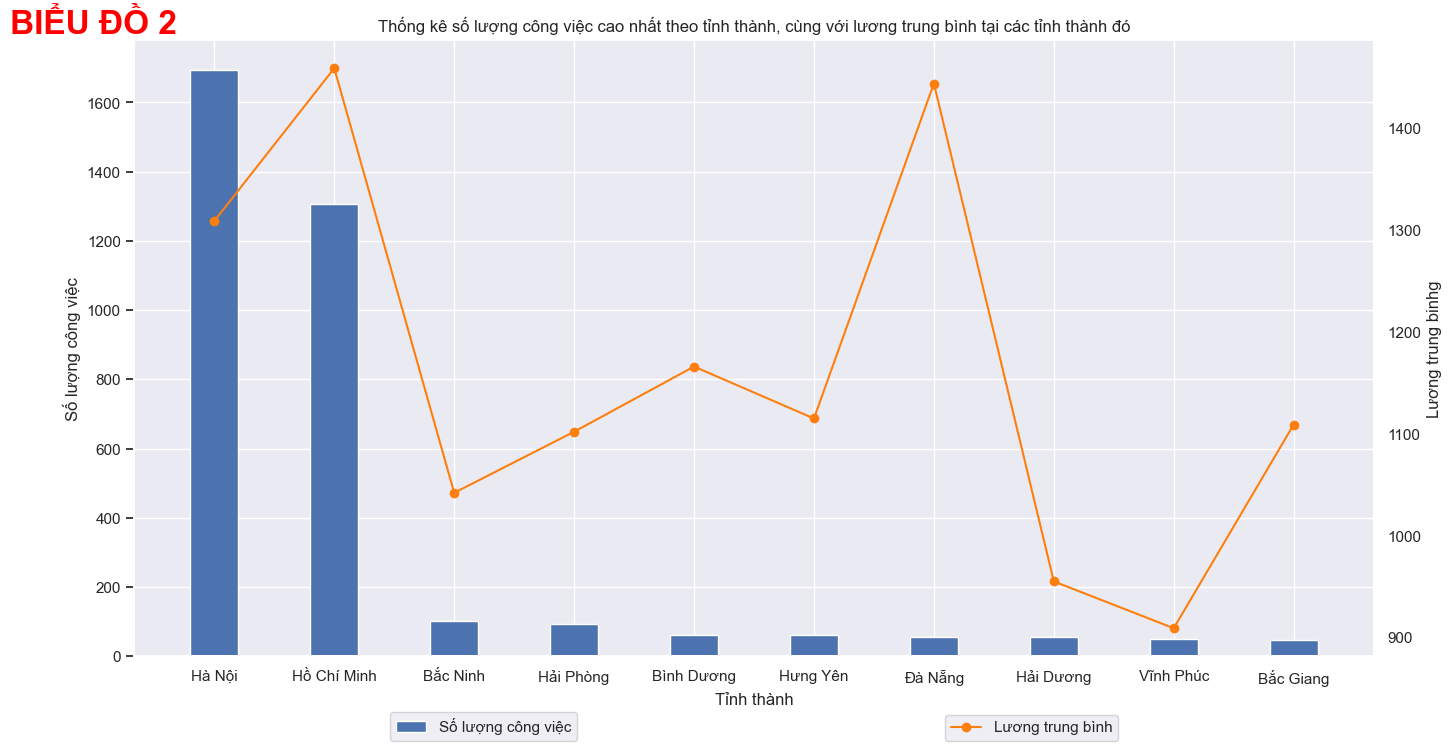

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(locations_number_jobs_df['workingLocations'], \
       locations_number_jobs_df['numberOfjobs'],width = 0.4)
ax.set_xlabel('Tỉnh thành')
ax.set_ylabel('Số lượng công việc')
ax.tick_params(left=False)
ax.legend(['Số lượng công việc'],loc='lower left',bbox_to_anchor=(0.2, -0.15))

ax2 = ax.twinx()
ax2.plot(locations_number_jobs_df['workingLocations'], \
         locations_number_jobs_df['avgsalary'],marker='o',color='#fe7f0e')
ax2.set_ylabel('Lương trung binhg')
ax2.grid(False)
ax2.tick_params(right=False)
ax2.legend(['Lương trung bình'],loc='lower right',bbox_to_anchor=(0.8, -0.15))
plt.title('Thống kê số lượng công việc cao nhất theo tỉnh thành, cùng với lương trung bình tại các tỉnh thành đó')
plt.text(-0.1, 1.05, "BIỂU ĐỒ 2", transform=ax.transAxes, fontsize=24, color = 'red' , fontweight='bold', va='top')
plt.show()

Nhận xét:
1. Từ biểu đồ 1 ta có thể thấy lương trung bình và số lượng công việc liên quan đến quốc tế đều rất cao, đây là môi trường tốt để nâng cao kỹ năng bản thân cũng như nâng cao thu nhập, một số tỉnh thành như Tuyên Quang, Ninh Thuận có mức lương trung bình cao nhưng số lượng công việc lại không có nhiều từ đó có thể cân nhắc tìm việc ở những khu vực đó.
2. Từ biểu đồ 2 ta có thể thấy chính xác Hà Nội và Hồ Chí Minh là những địa điểm có số lượng tuyển dụng cao nhất, điều này có thể là do đây là hai tỉnh thành trọng điểm của nước ta được đầu tư và phát triển mạnh mẽ, ngoài ra Đà Nẵng cũng không tệ làm địa điểm làm việc tuy có mức tuyển dụng không cao nhưng so với các tỉnh thành khác Đà Nẵng có mức lương trung bình rất cao.

<hr>
Số lượng các ngành tuyển dụng cao nhất và số lượng đơn tuyển dụng cao nhất cho mỗi ngành

In [ ]:
temp_df = df[df['numOfApplications'] != 0]
temp_df[['industries','numOfApplications']]

,industries,numOfApplications
7,"{7: 'Civil/Construction', 64: 'Electrical/Elec...",19
8,"{33: 'Sales', 42: 'Banking', 59: 'Finance/Inve...",196
9,"{17: 'Executive management', 33: 'Sales', 69: ...",51
18,"{12: 'Education/Training', 47: 'Interpreter/Tr...",23
19,"{23: 'Human Resources', 30: 'Real Estate', 73:...",39
...,...,...
8967,"{8: 'Consulting', 58: 'Auditing', 69: 'Plannin...",7
8968,"{8: 'Consulting', 58: 'Auditing', 69: 'Plannin...",7
8969,"{19: 'Export-Import', 36: 'Freight/Logistics'}",4
8970,"{8: 'Consulting', 11: 'Customer Service', 58: ...",6


In [ ]:
industries_napp_df = temp_df[['industries','numOfApplications']].copy()
industries_napp_df['industries'] = industries_napp_df['industries']\
                                    .astype(str)\
                                    .apply(lambda x: list(ast.literal_eval(x).values()))
industries_napp_df = industries_napp_df.explode('industries')
industries_napp_df

,industries,numOfApplications
7,Civil/Construction,19
7,Electrical/Electronics,19
7,Mechanical,19
8,Sales,196
8,Banking,196
...,...,...
8970,Customer Service,6
8970,Auditing,6
8971,Consulting,6
8971,Auditing,6


In [ ]:
industries_njobs = industries_napp_df.groupby('industries').count().reset_index()
industries_njobs = industries_njobs.rename(columns = {'numOfApplications': 'numOfJobs'})
industries_njobs

,industries,numOfJobs
0,Accounting,672
1,Administrative/Clerical,743
2,Advertising/Promotion/PR,424
3,Agriculture/Forestry,47
4,Airlines/Tourism,118
...,...,...
67,TV/Media/Newspaper,181
68,Telecommunications,105
69,Temporary/Contract,12
70,Textiles/Garments/Footwear,132


In [ ]:
industries_napp = industries_napp_df.groupby('industries').sum().reset_index()
industries_napp = industries_napp.rename(columns = {'numOfApplications': 'totalOfApplications'})
industries_napp

,industries,totalOfApplications
0,Accounting,34059
1,Administrative/Clerical,43607
2,Advertising/Promotion/PR,19944
3,Agriculture/Forestry,1326
4,Airlines/Tourism,3179
...,...,...
67,TV/Media/Newspaper,8886
68,Telecommunications,2619
69,Temporary/Contract,905
70,Textiles/Garments/Footwear,4952


In [ ]:
industries_df = pd.concat([industries_njobs, industries_napp['totalOfApplications']], axis=1)
industries_df

,industries,numOfJobs,totalOfApplications
0,Accounting,672,34059
1,Administrative/Clerical,743,43607
2,Advertising/Promotion/PR,424,19944
3,Agriculture/Forestry,47,1326
4,Airlines/Tourism,118,3179
...,...,...,...
67,TV/Media/Newspaper,181,8886
68,Telecommunications,105,2619
69,Temporary/Contract,12,905
70,Textiles/Garments/Footwear,132,4952


Số lượng ngành nghề tuyển dụng nhiều nhất

In [ ]:
industries_highnjobs_df = industries_df.sort_values\
                    (by = 'numOfJobs', ascending = False)[:10]
industries_highnjobs_df

,industries,numOfJobs,totalOfApplications
64,Sales,1505,52059
26,Finance/Investment,1117,49998
47,Marketing,778,37414
13,Customer Service,774,28804
1,Administrative/Clerical,743,43607
0,Accounting,672,34059
38,IT - Software,649,19723
18,Electrical/Electronics,632,24116
9,Banking,580,23551
7,Auditing,555,26217


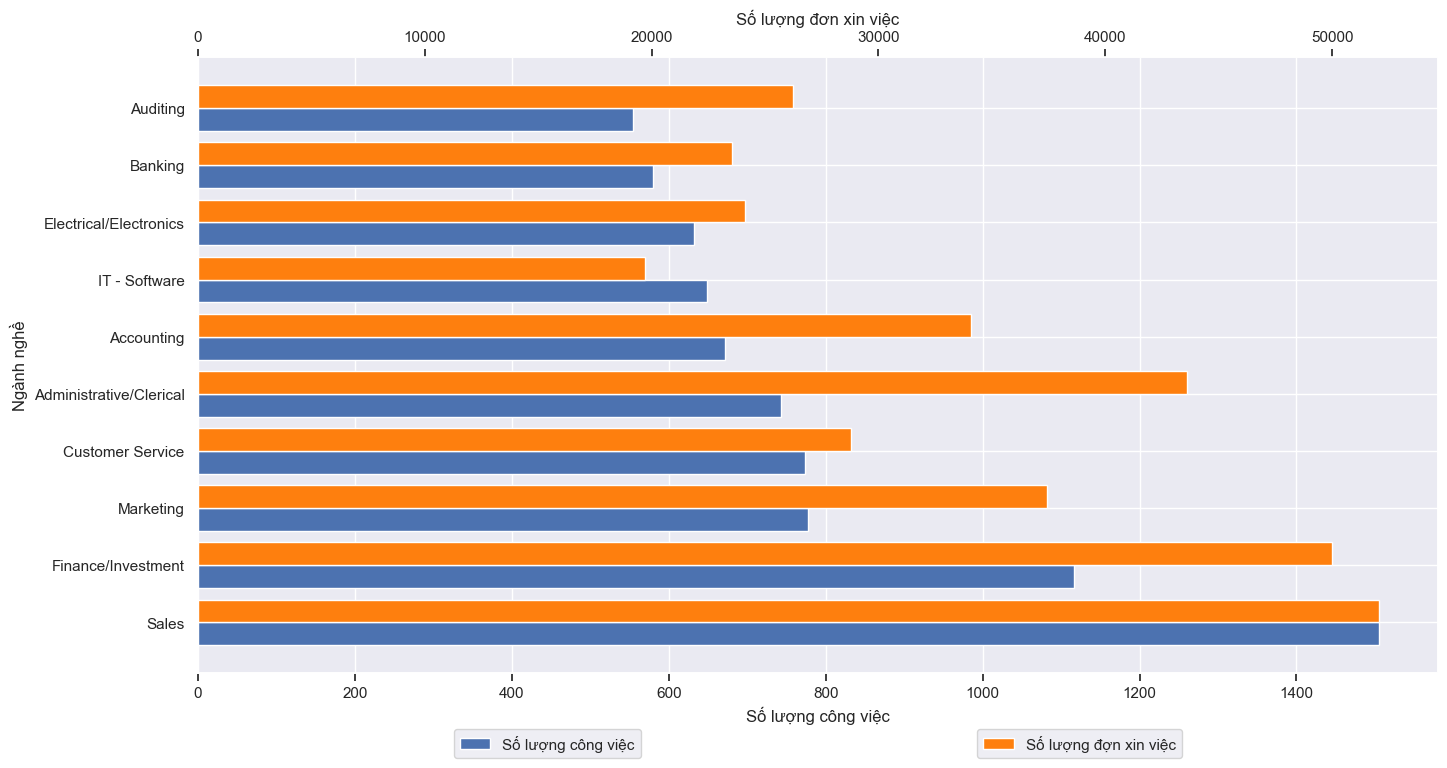

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
y_axis = np.arange(len(industries_highnjobs_df['industries']))
ax.barh(y_axis - 0.2, industries_highnjobs_df['numOfJobs'], 0.4)
ax.set_xlabel("Số lượng công việc")
ax.set_ylabel("Ngành nghề")
ax.legend(['Số lượng công việc'],loc='lower left',bbox_to_anchor=(0.2, -0.15))

ax2 = ax.twiny()
ax2.barh(y_axis + 0.2, industries_highnjobs_df['totalOfApplications'], 0.4,color='#fe7f0e')
ax2.set_xlabel("Số lượng đơn xin việc")
ax2.grid(False)
ax2.legend(['Số lượng đợn xin việc'],loc='lower right',bbox_to_anchor=(0.8, -0.15))
plt.yticks(y_axis, industries_highnjobs_df['industries'])
plt.show()

In [ ]:
industries_highnapps_df = industries_df.sort_values\
                    (by = 'totalOfApplications', ascending = False)[:10]
industries_highnapps_df

,industries,numOfJobs,totalOfApplications
64,Sales,1505,52059
26,Finance/Investment,1117,49998
1,Administrative/Clerical,743,43607
47,Marketing,778,37414
0,Accounting,672,34059
13,Customer Service,774,28804
36,Human Resources,411,28347
11,Civil/Construction,490,27276
7,Auditing,555,26217
18,Electrical/Electronics,632,24116


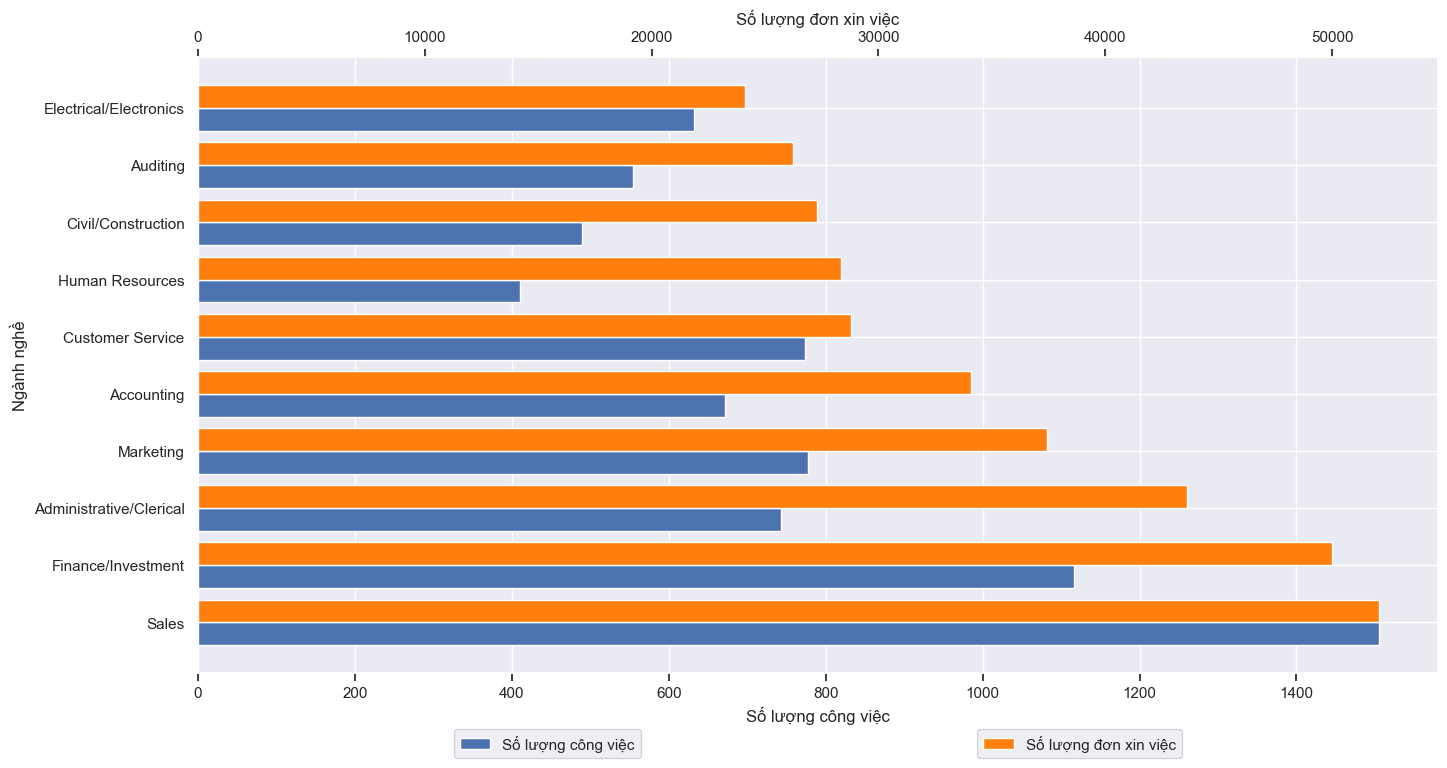

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
y_axis = np.arange(len(industries_highnapps_df['industries']))
ax.barh(y_axis - 0.2, industries_highnapps_df['numOfJobs'], 0.4)
ax.set_xlabel("Số lượng công việc")
ax.set_ylabel("Ngành nghề")
ax.legend(['Số lượng công việc'],loc='lower left',bbox_to_anchor=(0.2, -0.15))

ax2 = ax.twiny()
ax2.barh(y_axis + 0.2, industries_highnapps_df['totalOfApplications'], 0.4,color='#fe7f0e')
ax2.set_xlabel("Số lượng đơn xin việc")
ax2.grid(False)
ax2.legend(['Số lượng đơn xin việc'],loc='lower right',bbox_to_anchor=(0.8, -0.15))
plt.yticks(y_axis, industries_highnapps_df['industries'])
plt.show()

Nhận xét: <br>
1.Dựa vào hai biểu đồ về 10 ngành có số lượng việc làm và số lượng đơn xin việc cao nhất, có vẻ như danh sách các ngành hàng hàng đầu không thay đổi quá nhiều, Sales và Finance/Investment luôn đứng ở vị trí cao nhất.

2.Một điều chúng ta có thể thấy từ các biểu đồ này là ngành công nghệ thông tin - Phần mềm, mặc dù có số lượng việc làm trong top 10 nhưng không có số lượng đơn xin việc cao vì vậy các vị trí này có thể không phổ biến trong thời điểm hiện tại.

<hr>
<h5> Với các ngành có xu hướng cao, họ cần kỹ năng gì?

In [ ]:
top_10_industries_hnapps = list(industries_highnapps_df['industries'])
top_10_industries_hnapps

['Sales',
 'Finance/Investment',
 'Administrative/Clerical',
 'Marketing',
 'Accounting',
 'Customer Service',
 'Human Resources',
 'Civil/Construction',
 'Auditing',
 'Electrical/Electronics']

In [ ]:
df['skills'] = df['skills'].apply(lambda x :list(x.values()))
print(df['skills'])

0       [Kênh MT, Hàng Tiêu Dùng, FMCG, Bán Hàng, Quản...
1       [Marketing Materials Strategy, Social Media Pl...
2       [Kế Toán Tổng Hợp, Hạch Toán Chi Phí, Doanh Th...
3       [English, Trade Marketing, Data Analysis, Mark...
4       [Tìm Kiếm Khách Hàng, Chăm Sóc Khách Hàng, Tư ...
                              ...                        
8967    [Government Organizations, Public Administrati...
8968    [Government Organizations, ESG, Infrastructure...
8969    [Xuất Nhập Khẩu, Booking, Điều Phối Xe, Điều P...
8970    [Chinese, Business Deveploment, Audit, Tax, Co...
8971    [Risk, Business consulting, Audit, Business St...
Name: skills, Length: 8972, dtype: object


In [ ]:
df1 = df[['industries', 'skills']]

In [ ]:
df_exploded = df1.explode('industries').explode('skills')
df_exploded.columns = ['industries', 'skills']
print(df_exploded)

              industries                        skills
0       Customer Service                       Kênh MT
0       Customer Service                Hàng Tiêu Dùng
0       Customer Service                          FMCG
0       Customer Service                      Bán Hàng
0       Customer Service              Quản Lý Doanh Số
...                  ...                           ...
8971  Finance/Investment                          Risk
8971  Finance/Investment           Business consulting
8971  Finance/Investment                         Audit
8971  Finance/Investment  Business Strategy consulting
8971  Finance/Investment                      Analysis

[118105 rows x 2 columns]


In [ ]:
skills_top_10_industries_df = df_exploded[df_exploded['industries']\
                                                    .isin(top_10_industries_hnapps) ]
skills_top_10_industries_df

,industries,skills
0,Customer Service,Kênh MT
0,Customer Service,Hàng Tiêu Dùng
0,Customer Service,FMCG
0,Customer Service,Bán Hàng
0,Customer Service,Quản Lý Doanh Số
...,...,...
8971,Finance/Investment,Risk
8971,Finance/Investment,Business consulting
8971,Finance/Investment,Audit
8971,Finance/Investment,Business Strategy consulting


In [ ]:
skills_top_10_industries_df['skills'].value_counts().index

Index([], dtype='object', name='skills')

In [ ]:
def convert_English_to_Vietnamese(text): 
    lang, confidence = langid.classify(text)
    if lang == 'en':
        try:
            translation = translate(text, 'vi', 'en')
            return translation
        except Exception as e:
            print(f"Translation error: {e}")
            return text
    else: 
        return text

In [ ]:
skills_top_10_industries_df.to_csv('data/skills.csv',index = False)

In [ ]:
skills_df = pd.read_csv('data/skills.csv')
skills_top_10_industries_df.loc[skills_top_10_industries_df['industries'].index, 'skills'] = skills_df['skills']

In [ ]:
skills_top_10_industries_df['skills'] = skills_top_10_industries_df['skills'].replace('English','Tiếng Anh')

C:\Users\84936\AppData\Local\Temp\ipykernel_16376\1196037778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skills_top_10_industries_df['skills'] = skills_top_10_industries_df['skills'].replace('English','Tiếng Anh')


In [ ]:
skills_rank_df = skills_top_10_industries_df.groupby('industries').value_counts().reset_index()
skills_rank_df

,industries,skills,count
0,Accounting,Tiếng Anh,101
1,Accounting,Kinh Doanh,61
2,Accounting,Bán Hàng,58
3,Accounting,Tìm Kiếm Khách Hàng,55
4,Accounting,Chăm Sóc Khách Hàng,52
...,...,...,...
5738,Sales,Giám Sát Bán Hàng,1
5739,Sales,English Skill,1
5740,Sales,Medical Care Consultant,1
5741,Sales,Budget Forecast,1


In [ ]:
top_10_industries = list(skills_rank_df['industries'].unique())
top_10_industries

['Accounting',
 'Administrative/Clerical',
 'Auditing',
 'Civil/Construction',
 'Customer Service',
 'Electrical/Electronics',
 'Finance/Investment',
 'Human Resources',
 'Marketing',
 'Sales']

In [ ]:
list_skills_name = []
list_skills_value = []
for industry in top_10_industries: 
    skills_rank_each_job = skills_rank_df[skills_rank_df['industries'] == industry]
    list_skills_name.append(list(skills_rank_each_job['skills'].iloc[0:7]))
    list_skills_value.append(list(skills_rank_each_job['count'].iloc[0:7]))

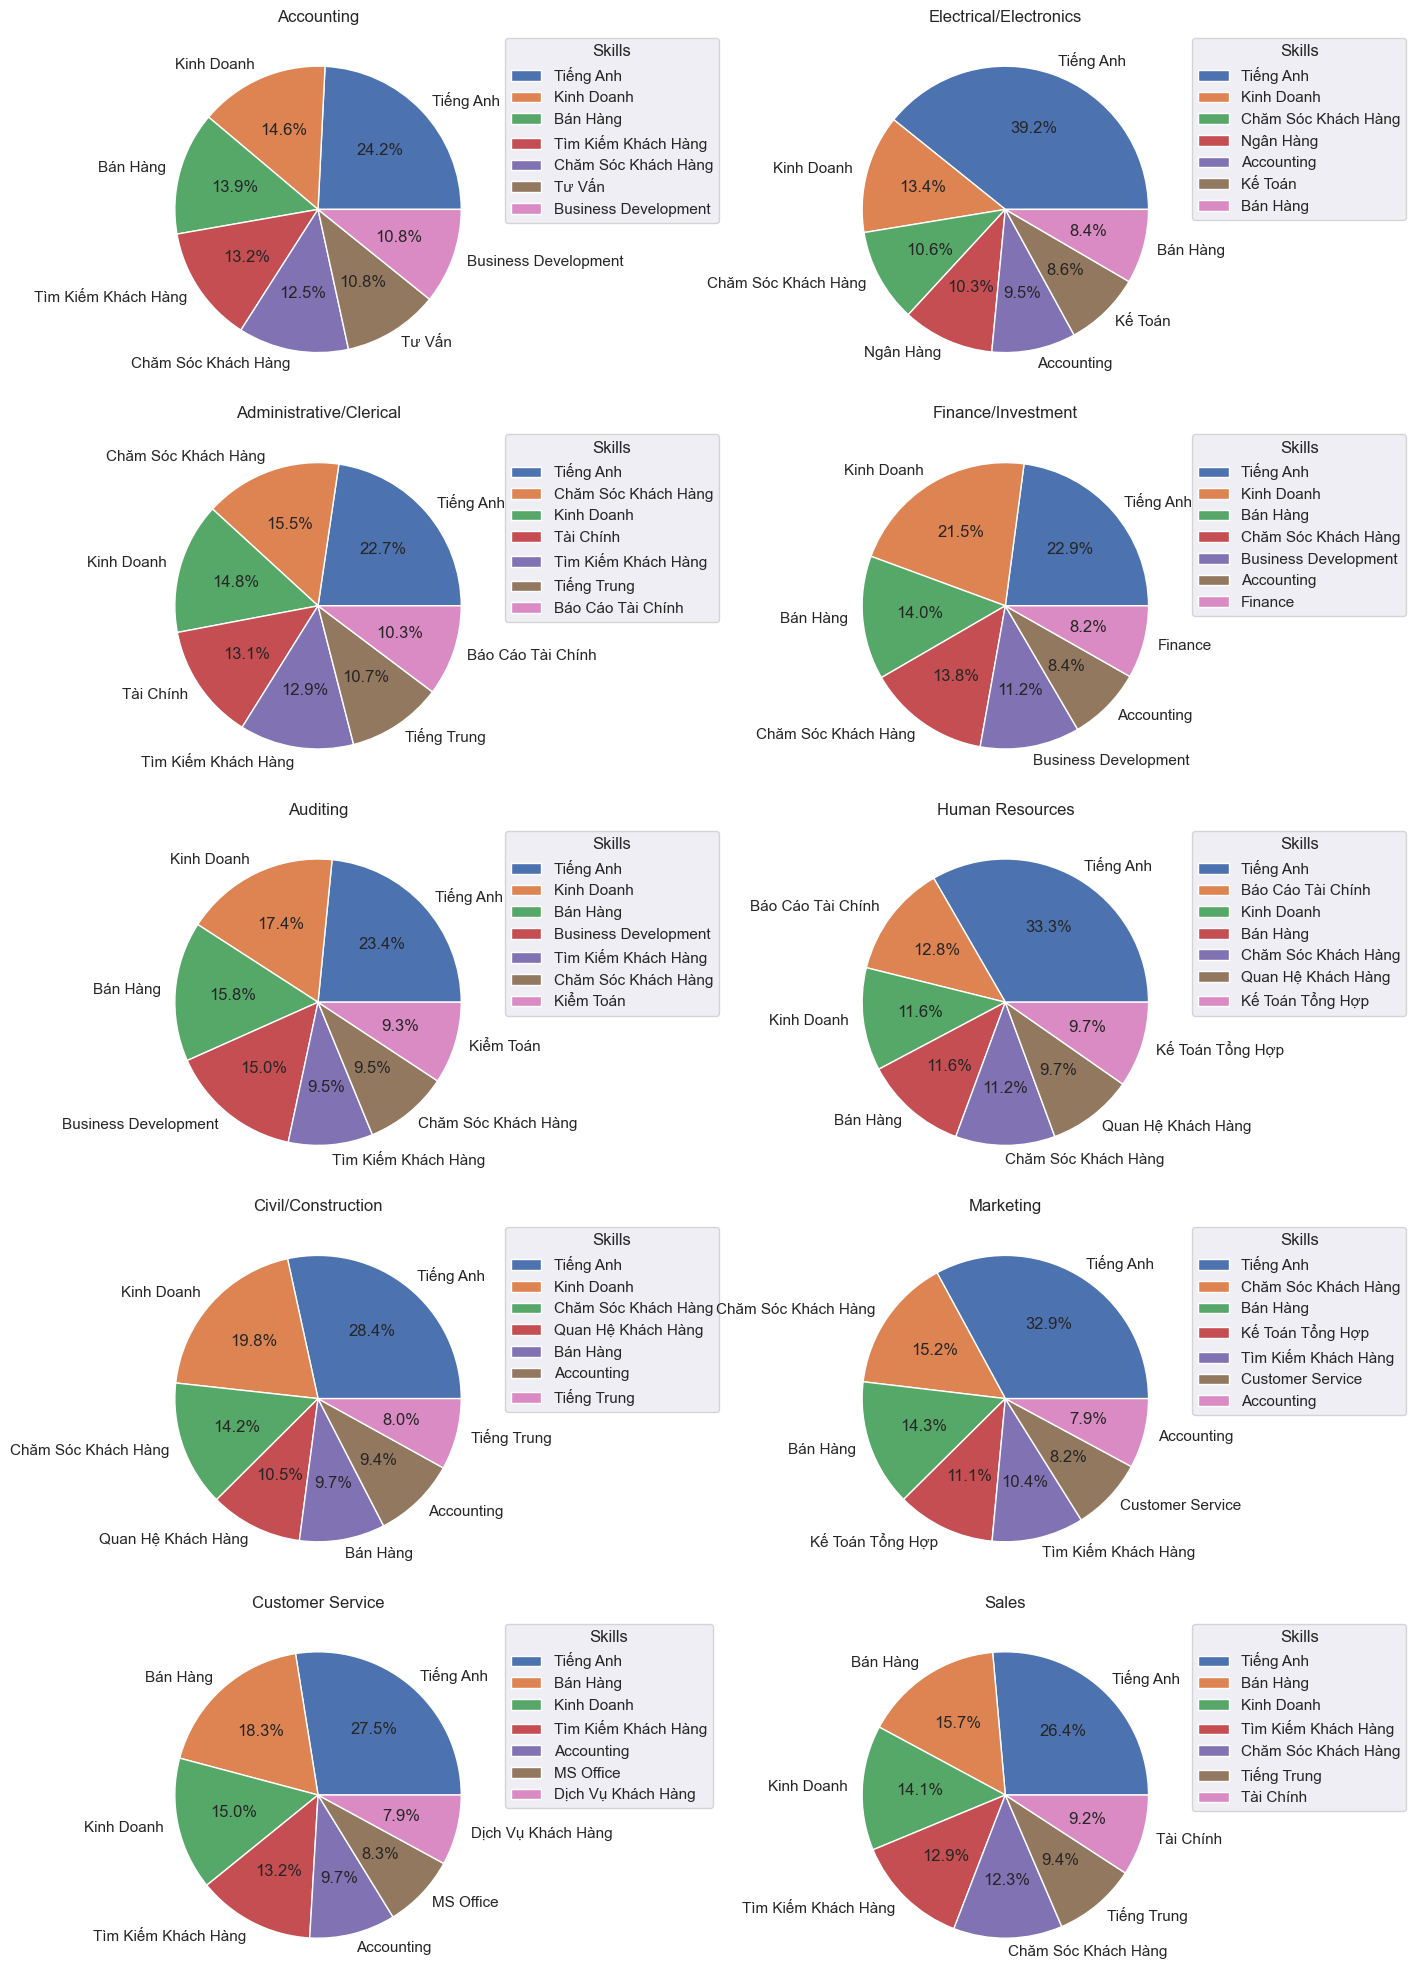

In [ ]:
fig, ax = plt.subplots(5,2)
fig.set_figwidth(14)
fig.set_figheight(20)
idx = 0
for i in range(2):
    for j in range(5):
        ax[j,i].pie(list_skills_value[idx],labels = list_skills_name[idx],autopct='%1.1f%%')
        ax[j,i].legend(title = "Skills",loc='best',bbox_to_anchor=(1, 1))
        ax[j,i].set_title(top_10_industries[idx])
        idx+=1
plt.tight_layout()
plt.show()